In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
dataset_name = '10x'

In [3]:
hidden = np.load(f'/home/zqzhao/workplace/OSMVC-master/latent/{dataset_name}_glb_vector.npy')
hidden.shape

(9631, 1000)

In [4]:
hidden = sc.AnnData(X=hidden)
sc.pp.neighbors(hidden, use_rep="X")
sc.tl.umap(hidden)

In [5]:
y = sc.read_h5ad("/home/zqzhao/workplace/Multi_omics_unet/dataset/10x/10x-Multiome-Pbmc10k-RNA.h5ad").obs['cell_type'].values
hidden.obs['label'] = y.astype(str)

/home/zqzhao/software/anaconda3/envs/pytorch1.10/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


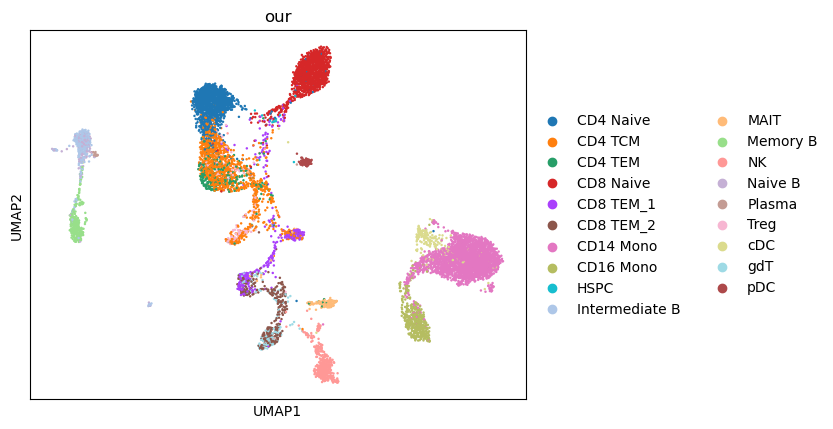

In [6]:
sc.pl.umap(hidden, color='label', title='our', show=False) #palette='Set1'
plt.savefig(f'/home/zqzhao/workplace/OSMVC-master/plot/{dataset_name}_umap.svg', bbox_inches='tight')

In [7]:
pred = np.load('/home/zqzhao/workplace/OSMVC-master/latent/10x_target_pred.npy')
pred

array([ 9,  8, 11, ..., 16, 10,  9])

In [8]:
# def transform_label(labels):
#     from sklearn.preprocessing import LabelEncoder
#     label_encoder = LabelEncoder()
#     label_encoder.fit(labels)
#     labels = label_encoder.transform(labels)
#     return labels

In [9]:
# from sklearn.metrics import confusion_matrix
# label = transform_label(y)
# cm = confusion_matrix(label, pred)
# # 找到每列的最大值行作为映射
# max_indices = np.argmax(cm, axis=0)
# pred = np.array([max_indices[i] for i in pred])
# pred

In [10]:
np.unique(pred)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

In [11]:
np.unique(y)

array(['CD14 Mono', 'CD16 Mono', 'CD4 Naive', 'CD4 TCM', 'CD4 TEM',
       'CD8 Naive', 'CD8 TEM_1', 'CD8 TEM_2', 'HSPC', 'Intermediate B',
       'MAIT', 'Memory B', 'NK', 'Naive B', 'Plasma', 'Treg', 'cDC',
       'gdT', 'pDC'], dtype=object)

In [12]:
hidden.obs['pred'] = pred.astype(str)

In [13]:
rna = sc.read_h5ad("/home/zqzhao/workplace/Multi_omics_unet/dataset/10x/10x-Multiome-Pbmc10k-RNA.h5ad")

In [14]:
rna.obs['pred'] = pred.astype(str)
adata = rna.copy()

In [15]:
np.unique(pred)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

In [16]:
sc.tl.rank_genes_groups(rna, 'cell_type', method='wilcoxon')

/home/zqzhao/software/anaconda3/envs/pytorch1.10/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:419: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


         Falling back to preprocessing with `sc.pp.pca` and default params.


/home/zqzhao/software/anaconda3/envs/pytorch1.10/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


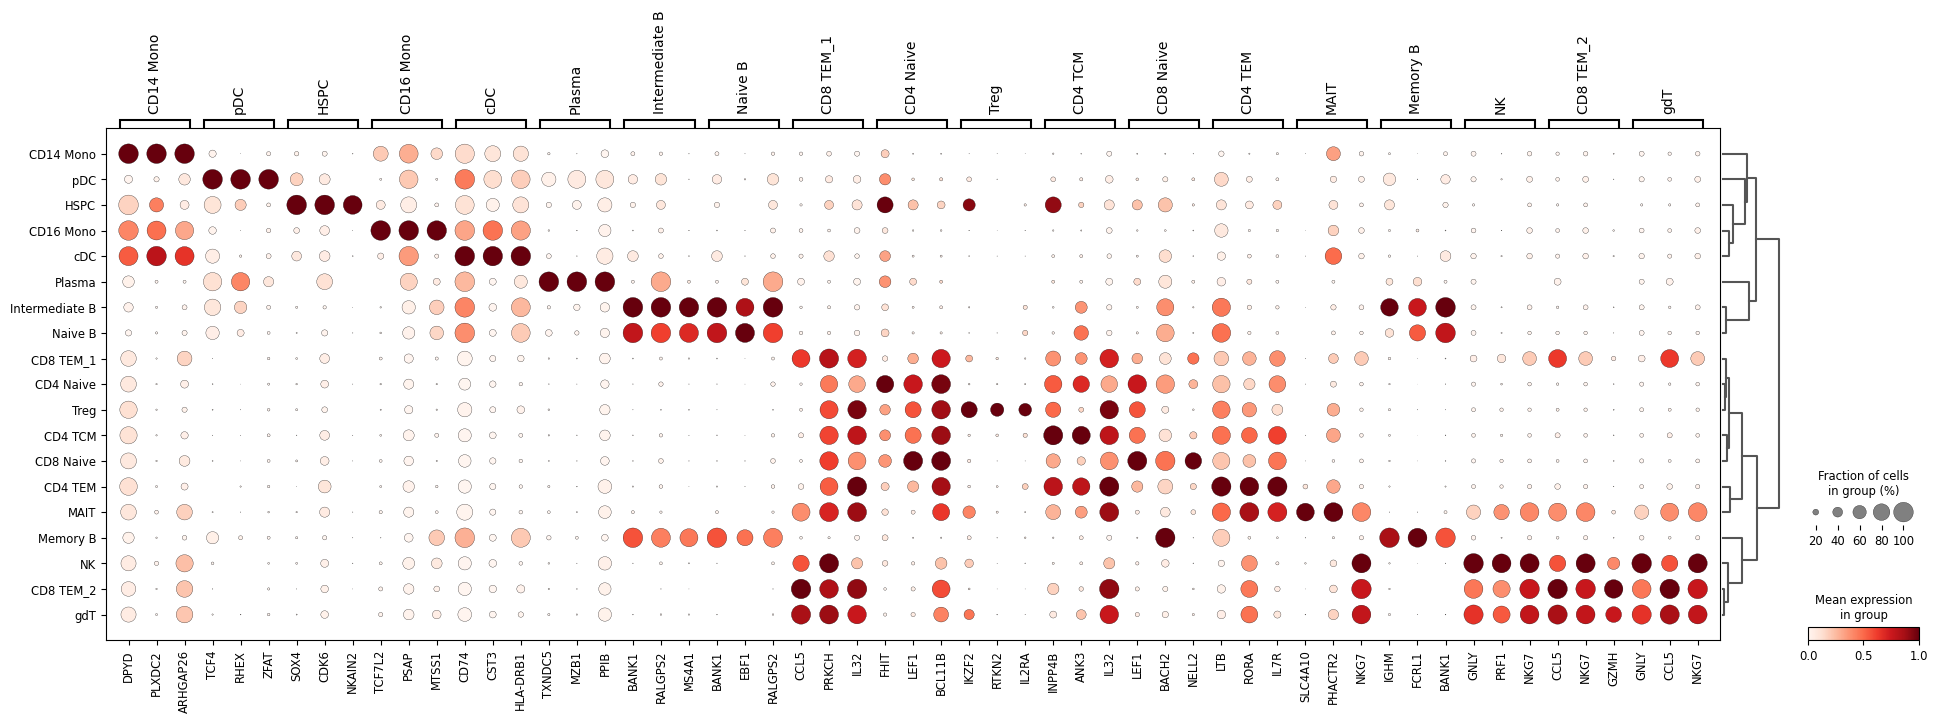

In [17]:
sc.pl.rank_genes_groups_dotplot(rna, n_genes=3, groupby='cell_type', standard_scale='var', show=False)
plt.savefig(f'/home/zqzhao/workplace/OSMVC-master/plot/rst/{dataset_name}_true_dot.svg', bbox_inches='tight')

In [20]:
adata = rna.copy()
adata = adata[~adata.obs['pred'].isin(['18', '14'])]

/home/zqzhao/software/anaconda3/envs/pytorch1.10/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


/home/zqzhao/software/anaconda3/envs/pytorch1.10/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


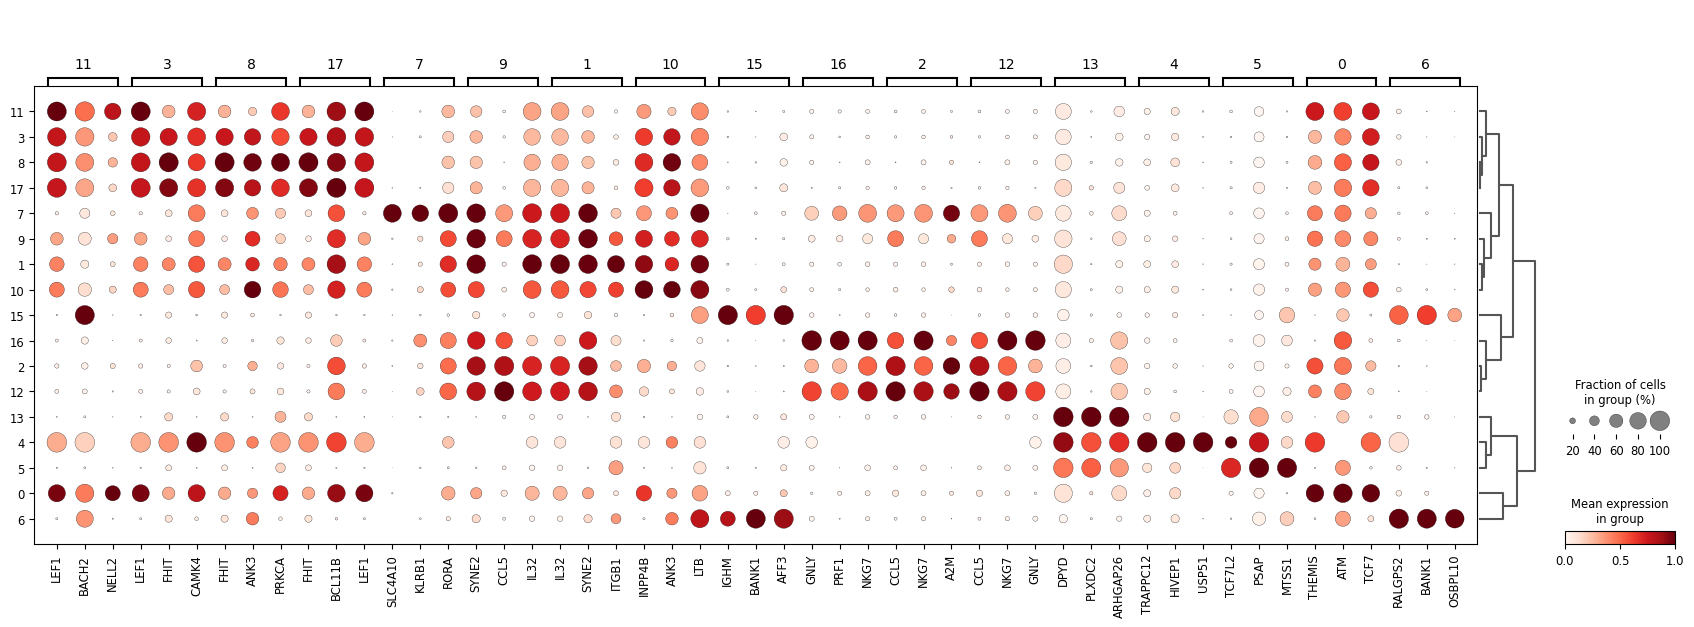

In [21]:
sc.tl.rank_genes_groups(adata, 'pred', method='wilcoxon')
sc.pl.rank_genes_groups_dotplot(adata, n_genes=3, groupby='pred', standard_scale='var', show=False)
plt.savefig(f'/home/zqzhao/workplace/OSMVC-master/plot/rst/{dataset_name}_pred_dot.svg', bbox_inches='tight')

In [26]:
hidden.obs.index = rna.obs.index

In [28]:
hidden = hidden[adata.obs.index]

In [29]:
adata.obsm = hidden.obsm

In [32]:
set(["CAMK4", "SLC4A10", "KLRB1", "IGHM", "BANK1", "AFF3", "GNLY", "DPYD", "TRAPPC12", "HIVEP1", "USP51", "PSAP", "MTSS1", "THEMIS", "RALGPS2", "OSBPL10", "cell_type"])

{'AFF3',
 'BANK1',
 'CAMK4',
 'DPYD',
 'GNLY',
 'HIVEP1',
 'IGHM',
 'KLRB1',
 'MTSS1',
 'OSBPL10',
 'PSAP',
 'RALGPS2',
 'SLC4A10',
 'THEMIS',
 'TRAPPC12',
 'USP51',
 'cell_type'}

/home/zqzhao/software/anaconda3/envs/pytorch1.10/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


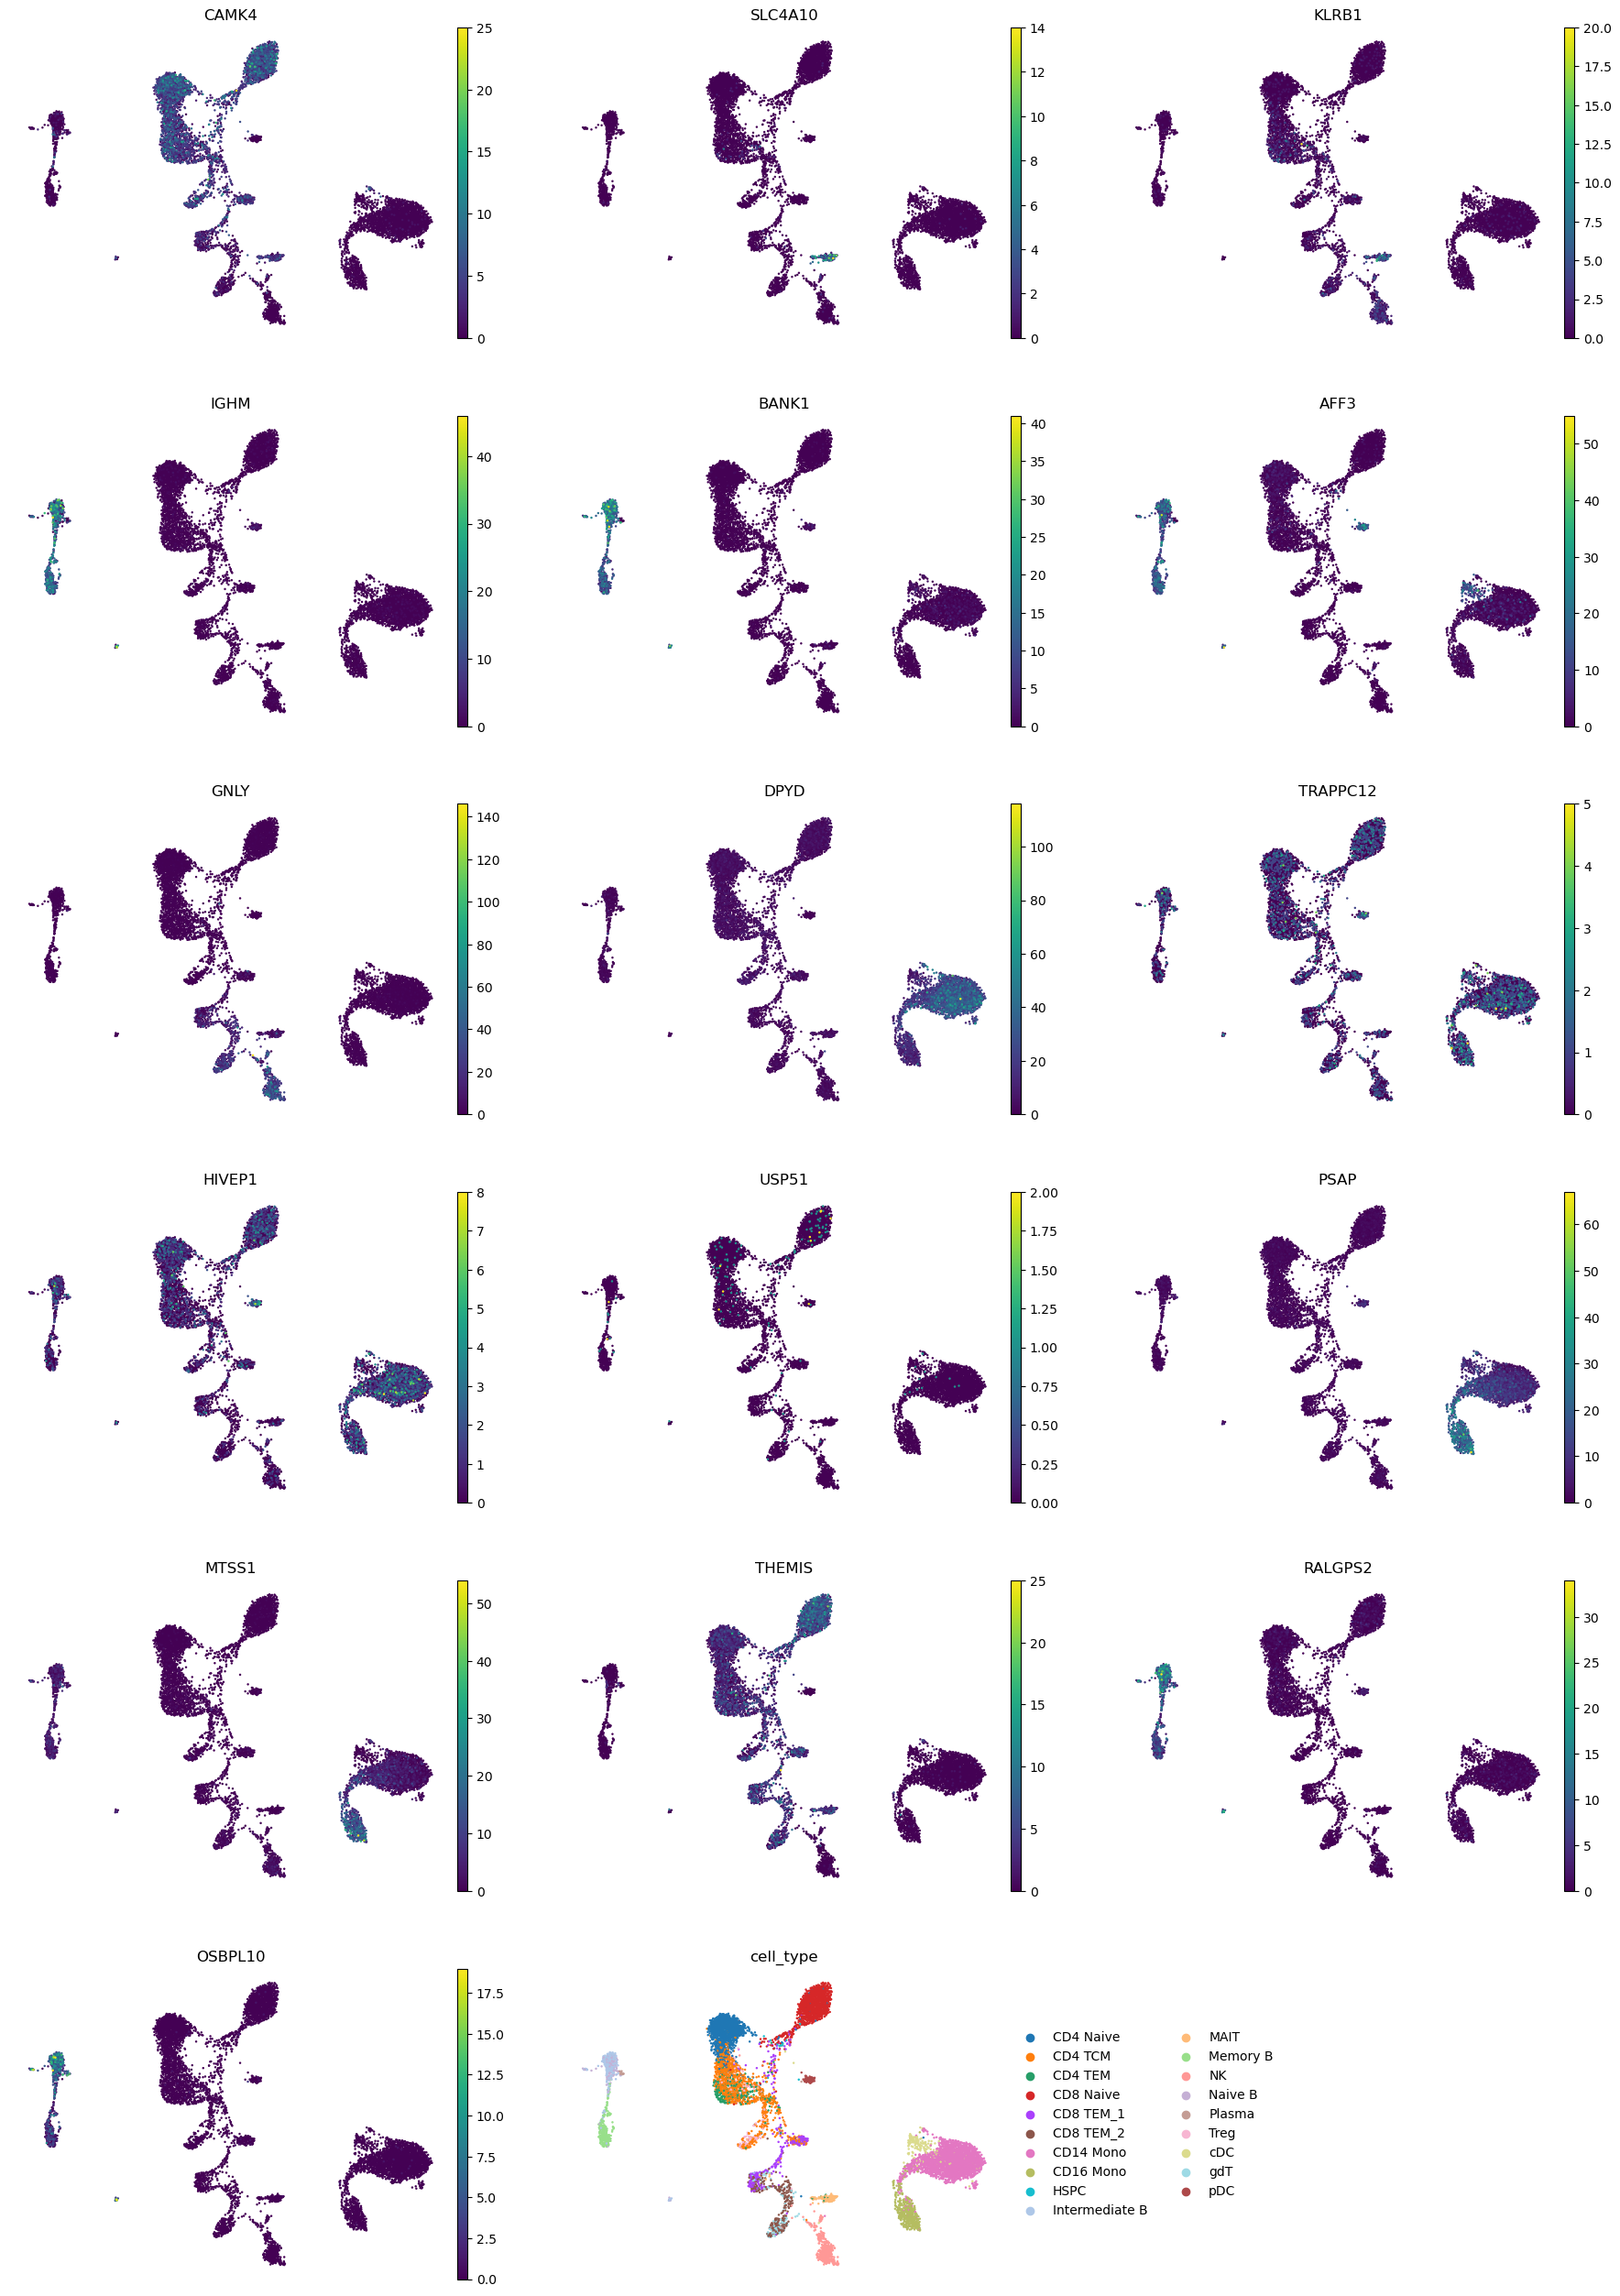

In [33]:
sc.pl.umap(adata, color=["CAMK4", "SLC4A10", "KLRB1", "IGHM", "BANK1", "AFF3", "GNLY", "DPYD", "TRAPPC12", "HIVEP1", "PSAP", "MTSS1", "THEMIS", "RALGPS2", "OSBPL10", "cell_type"], ncols=3, frameon=False, show=False)
plt.savefig(f'/home/zqzhao/workplace/OSMVC-master/plot/rst/{dataset_name}_RNA_UMI.svg', bbox_inches='tight')